In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eispac
import astropy.units as u
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D
from specutils.manipulation import SplineInterpolatedResampler
import h5py
from juanfit import SpectrumFitSingle

In [2]:
with h5py.File("../../sav/EIS/NPCHDB/NPCHDB_tiltcorr_crop.h5", 'r') as hf:
    for key_ in hf.keys():
        vars()[key_] = hf[key_][:]

In [3]:
def return_mask_and_slitwidth(ccd_offset, ccd_offset_FeXII, FeXII_bl, slit_width):
    xcoord = np.linspace(0,154,78) + FeXII_bl[0]
    ycoord = np.linspace(0,511,512) + FeXII_bl[1] + ccd_offset_FeXII - ccd_offset
    y_grid, x_grid = np.meshgrid(ycoord,xcoord,indexing="ij")
    height_grid = np.sqrt(y_grid**2 + x_grid**2)/950
    slit_grid = np.sqrt(xcoord[39]**2 + ycoord**2)/950

    mask_1 = np.where((height_grid >= 1.03) & (height_grid < 1.08))
    mask_2 = np.where((height_grid >= 1.08) & (height_grid < 1.13))
    mask_3 = np.where((height_grid >= 1.13) & (height_grid < 1.18))
    mask_sl =  np.where(height_grid < 0.98)

    slit_width_mask_1 = np.where((slit_grid >= 1.03) & (slit_grid < 1.08))
    slit_width_mask_2 = np.where((slit_grid >= 1.08) & (slit_grid < 1.13))
    slit_width_mask_3 = np.where((slit_grid >= 1.13) & (slit_grid < 1.18))

    slit_width_r1 = np.nanmean(slit_width[slit_width_mask_1])
    slit_width_r2 = np.nanmean(slit_width[slit_width_mask_2])
    slit_width_r3 = np.nanmean(slit_width[slit_width_mask_3])

    return mask_1, mask_2, mask_3, slit_width_r1, slit_width_r2, slit_width_r3, mask_sl

In [4]:
ccd_offset_FeXII = ccd_offset_6[14]

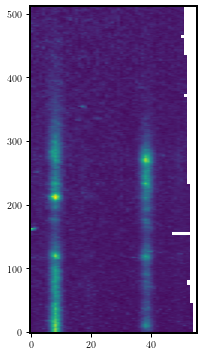

In [5]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_2[:,30,:],origin="lower",aspect="auto")

In [6]:
FeX_184_slice = slice(0,20)
FeX_184_wvl = wvl_cube_2[FeX_184_slice]

(FeX_184_region_1, FeX_184_region_2,FeX_184_region_3, 
FeX_184_slit_width_1, FeX_184_slit_width_2, FeX_184_slit_width_3,
FeX_184_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_2[FeX_184_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_2)
FeX_184_data_region_1 = data_cube_2[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_data_region_2 = data_cube_2[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]
FeX_184_data_region_3 = data_cube_2[FeX_184_region_3[0],FeX_184_region_3[1],FeX_184_slice]
FeX_184_data_region_sl = data_cube_2[FeX_184_region_sl[0],FeX_184_region_sl[1],FeX_184_slice]

FeX_184_err_region_1 = err_cube_2[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_err_region_2 = err_cube_2[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]
FeX_184_err_region_3 = err_cube_2[FeX_184_region_3[0],FeX_184_region_3[1],FeX_184_slice]

FeX_184_data_aver_r1 = np.nanmean(FeX_184_data_region_1, axis=0) - 0.02*np.nanmean(FeX_184_data_region_sl, axis=0)
FeX_184_data_aver_r2 = np.nanmean(FeX_184_data_region_2, axis=0) - 0.02*np.nanmean(FeX_184_data_region_sl, axis=0)
FeX_184_data_aver_r3 = np.nanmean(FeX_184_data_region_3, axis=0) - 0.02*np.nanmean(FeX_184_data_region_sl, axis=0)


FeX_184_err_aver_r1 = np.sqrt(np.nanmean(FeX_184_err_region_1**2,axis=0))/np.sqrt(FeX_184_err_region_1.shape[0])
FeX_184_err_aver_r2 = np.sqrt(np.nanmean(FeX_184_err_region_2**2,axis=0))/np.sqrt(FeX_184_err_region_2.shape[0])
FeX_184_err_aver_r3 = np.sqrt(np.nanmean(FeX_184_err_region_3**2,axis=0))/np.sqrt(FeX_184_err_region_3.shape[0])

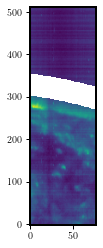

In [7]:
test_map = np.nansum(data_cube_2,axis=2)
test_map[FeX_184_region_1[0],FeX_184_region_1[1]] = np.nan
plt.imshow(test_map, origin="lower",aspect=0.5)

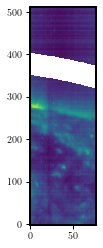

In [8]:
test_map = np.nansum(data_cube_2,axis=2)
test_map[FeX_184_region_2[0],FeX_184_region_2[1]] = np.nan
plt.imshow(test_map, origin="lower",aspect=0.5)

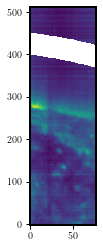

In [9]:
test_map = np.nansum(data_cube_2,axis=2)
test_map[FeX_184_region_3[0],FeX_184_region_3[1]] = np.nan
plt.imshow(test_map, origin="lower",aspect=0.5)

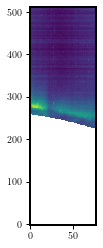

In [10]:
test_map = np.nansum(data_cube_2,axis=2)
test_map[FeX_184_region_sl[0],FeX_184_region_sl[1]] = np.nan
plt.imshow(test_map, origin="lower",aspect=0.5)

Corrected line width 35.9 mÅ
Corrected line width with smaller dlambda inst 48.7 mÅ


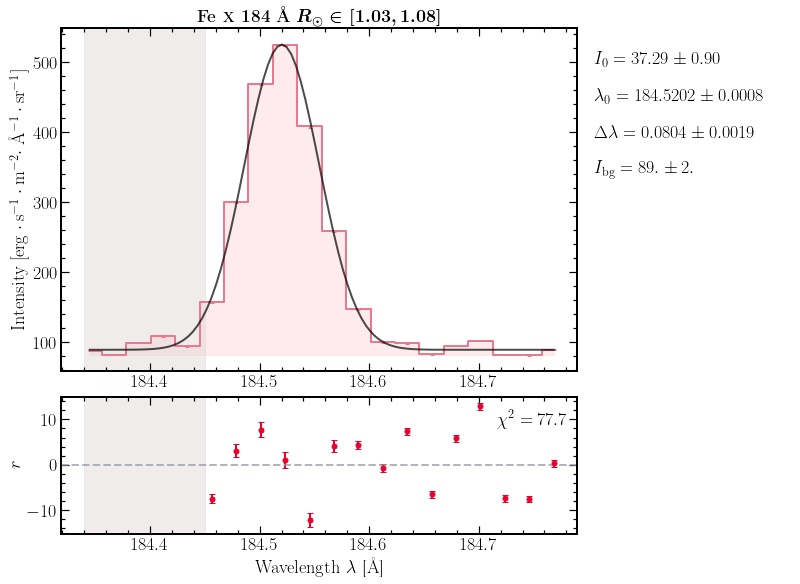

In [11]:
FeX_184_fitmodel_r1 = SpectrumFitSingle(data=FeX_184_data_aver_r1, wvl=FeX_184_wvl,err=FeX_184_err_aver_r1,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r1.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r1.fwhm_fit[0]**2 - FeX_184_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 61.6 mÅ
Corrected line width with smaller dlambda inst 71.6 mÅ


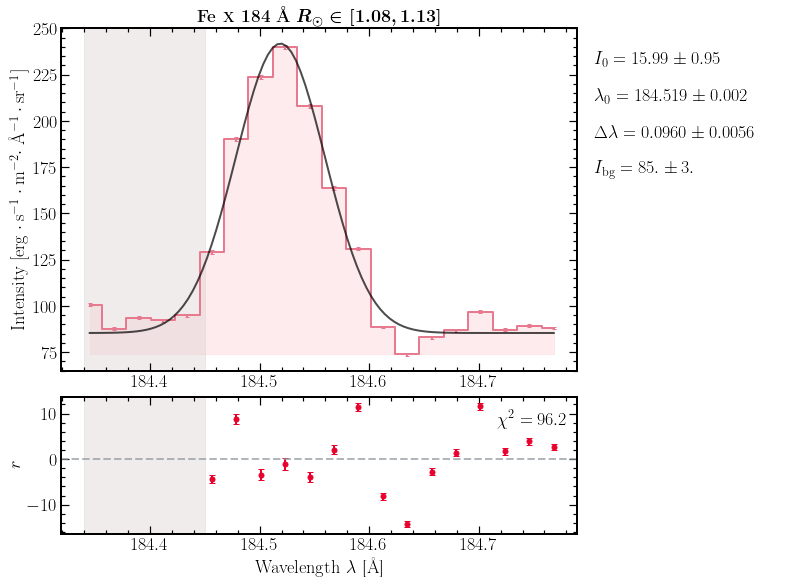

In [12]:
FeX_184_fitmodel_r2 = SpectrumFitSingle(data=FeX_184_data_aver_r2, wvl=FeX_184_wvl,err=FeX_184_err_aver_r2,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[2e2],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r2.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r2.fwhm_fit[0]**2 - FeX_184_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 51.1 mÅ
Corrected line width with smaller dlambda inst 64.8 mÅ


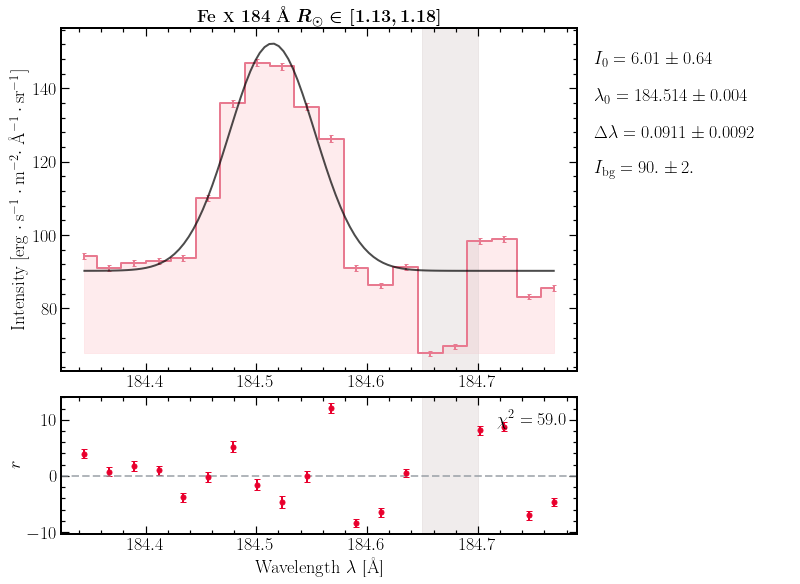

In [13]:
FeX_184_fitmodel_r3 = SpectrumFitSingle(data=FeX_184_data_aver_r3, wvl=FeX_184_wvl,err=FeX_184_err_aver_r3,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e2],fwhm_init=[0.07],
                                        mask=[[184.65,184.7]])
FeX_184_fitmodel_r3.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r3.fwhm_fit[0]**2 - FeX_184_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

In [14]:
FeVIII_185_slice = slice(32,46)
FeVIII_185_wvl = wvl_cube_2[FeVIII_185_slice]

(FeVIII_185_region_1, FeVIII_185_region_2,FeVIII_185_region_3, 
FeVIII_185_slit_width_1, FeVIII_185_slit_width_2, FeVIII_185_slit_width_3,
FeVIII_185_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_2[FeVIII_185_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_2)
FeVIII_185_data_region_1 = data_cube_2[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_data_region_2 = data_cube_2[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]
FeVIII_185_data_region_3 = data_cube_2[FeVIII_185_region_3[0],FeVIII_185_region_3[1],FeVIII_185_slice]
FeVIII_185_data_region_sl = data_cube_2[FeVIII_185_region_sl[0],FeVIII_185_region_sl[1],FeVIII_185_slice]

FeVIII_185_err_region_1 = err_cube_2[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_err_region_2 = err_cube_2[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]
FeVIII_185_err_region_3 = err_cube_2[FeVIII_185_region_3[0],FeVIII_185_region_3[1],FeVIII_185_slice]

FeVIII_185_data_aver_r1 = np.nanmean(FeVIII_185_data_region_1, axis=0) - 0.02*np.nanmean(FeVIII_185_data_region_sl, axis=0)
FeVIII_185_data_aver_r2 = np.nanmean(FeVIII_185_data_region_2, axis=0) - 0.02*np.nanmean(FeVIII_185_data_region_sl, axis=0)
FeVIII_185_data_aver_r3 = np.nanmean(FeVIII_185_data_region_3, axis=0) - 0.02*np.nanmean(FeVIII_185_data_region_sl, axis=0)


FeVIII_185_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_185_err_region_1**2,axis=0))/np.sqrt(FeVIII_185_err_region_1.shape[0])
FeVIII_185_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_185_err_region_2**2,axis=0))/np.sqrt(FeVIII_185_err_region_2.shape[0])
FeVIII_185_err_aver_r3 = np.sqrt(np.nanmean(FeVIII_185_err_region_3**2,axis=0))/np.sqrt(FeVIII_185_err_region_3.shape[0])

Corrected line width 45.1 mÅ
Corrected line width with smaller dlambda inst 55.8 mÅ


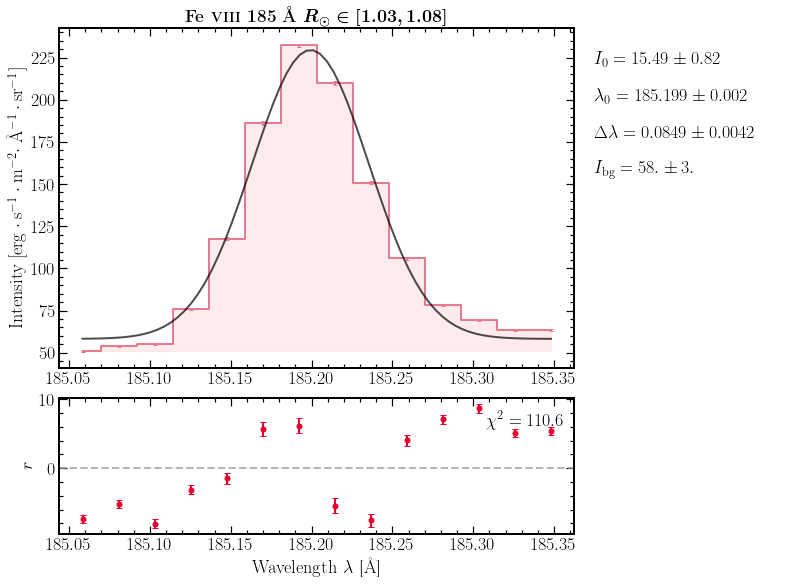

In [15]:
FeVIII_185_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_185_data_aver_r1, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r1,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r1.fwhm_fit[0]**2 - FeVIII_185_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 69.0 mÅ
Corrected line width with smaller dlambda inst 78.0 mÅ


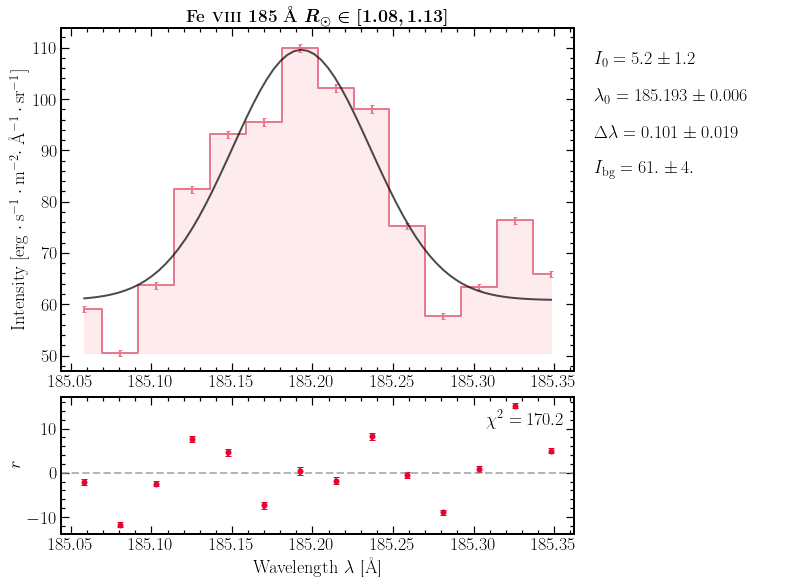

In [16]:
FeVIII_185_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_185_data_aver_r2, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r2,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[5e1],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r2.fwhm_fit[0]**2 - FeVIII_185_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 63.1 mÅ
Corrected line width with smaller dlambda inst 74.7 mÅ


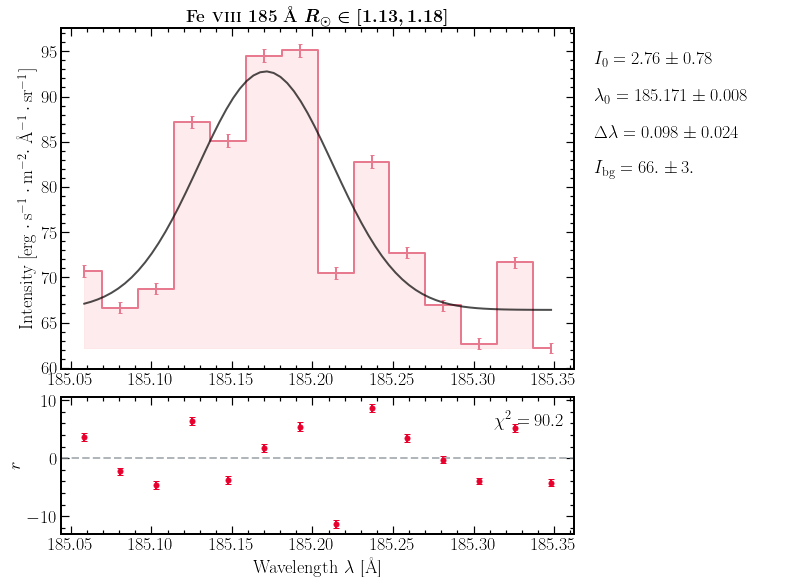

In [17]:
FeVIII_185_fitmodel_r3 = SpectrumFitSingle(data=FeVIII_185_data_aver_r3, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r3,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[5e1],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r3.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r3.fwhm_fit[0]**2 - FeVIII_185_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

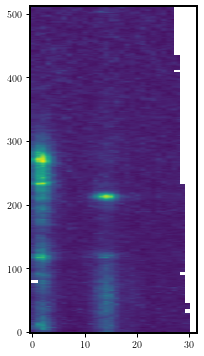

In [18]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_3[:,30,:],origin="lower",aspect="auto")

In [19]:
FeVIII_186_slice = slice(0,11)
FeVIII_186_wvl = wvl_cube_3[FeVIII_186_slice]

(FeVIII_186_region_1, FeVIII_186_region_2,FeVIII_186_region_3, 
FeVIII_186_slit_width_1, FeVIII_186_slit_width_2, FeVIII_186_slit_width_3,
FeVIII_186_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_3[FeVIII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_3)
FeVIII_186_data_region_1 = data_cube_3[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_data_region_2 = data_cube_3[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]
FeVIII_186_data_region_3 = data_cube_3[FeVIII_186_region_3[0],FeVIII_186_region_3[1],FeVIII_186_slice]
FeVIII_186_data_region_sl = data_cube_3[FeVIII_186_region_sl[0],FeVIII_186_region_sl[1],FeVIII_186_slice]

FeVIII_186_err_region_1 = err_cube_3[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_err_region_2 = err_cube_3[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]
FeVIII_186_err_region_3 = err_cube_3[FeVIII_186_region_3[0],FeVIII_186_region_3[1],FeVIII_186_slice]

FeVIII_186_data_aver_r1 = np.nanmean(FeVIII_186_data_region_1, axis=0) - 0.02*np.nanmean(FeVIII_186_data_region_sl, axis=0)
FeVIII_186_data_aver_r2 = np.nanmean(FeVIII_186_data_region_2, axis=0) - 0.02*np.nanmean(FeVIII_186_data_region_sl, axis=0)
FeVIII_186_data_aver_r3 = np.nanmean(FeVIII_186_data_region_3, axis=0) - 0.02*np.nanmean(FeVIII_186_data_region_sl, axis=0)


FeVIII_186_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_186_err_region_1**2,axis=0))/np.sqrt(FeVIII_186_err_region_1.shape[0])
FeVIII_186_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_186_err_region_2**2,axis=0))/np.sqrt(FeVIII_186_err_region_2.shape[0])
FeVIII_186_err_aver_r3 = np.sqrt(np.nanmean(FeVIII_186_err_region_3**2,axis=0))/np.sqrt(FeVIII_186_err_region_3.shape[0])

Corrected line width 35.4 mÅ
Corrected line width with smaller dlambda inst 48.4 mÅ


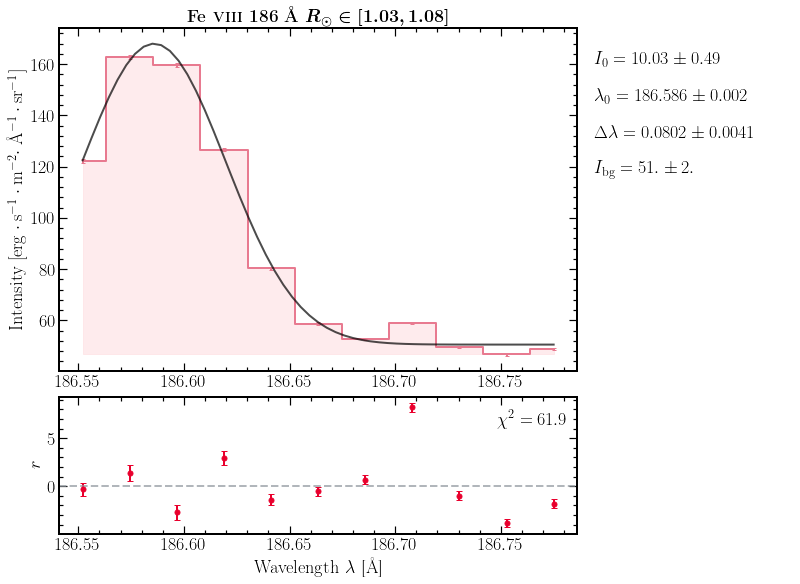

In [20]:
FeVIII_186_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_186_data_aver_r1, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r1.fwhm_fit[0]**2 - FeVIII_186_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 53.7 mÅ
Corrected line width with smaller dlambda inst 64.9 mÅ


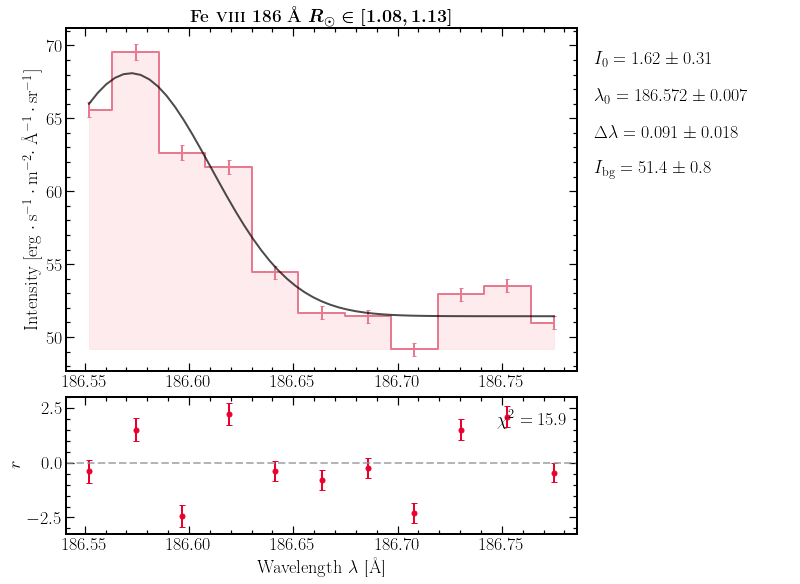

In [21]:
FeVIII_186_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_186_data_aver_r2, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r2,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e1],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r2.fwhm_fit[0]**2 - FeVIII_186_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 47.4 mÅ
Corrected line width with smaller dlambda inst 61.9 mÅ


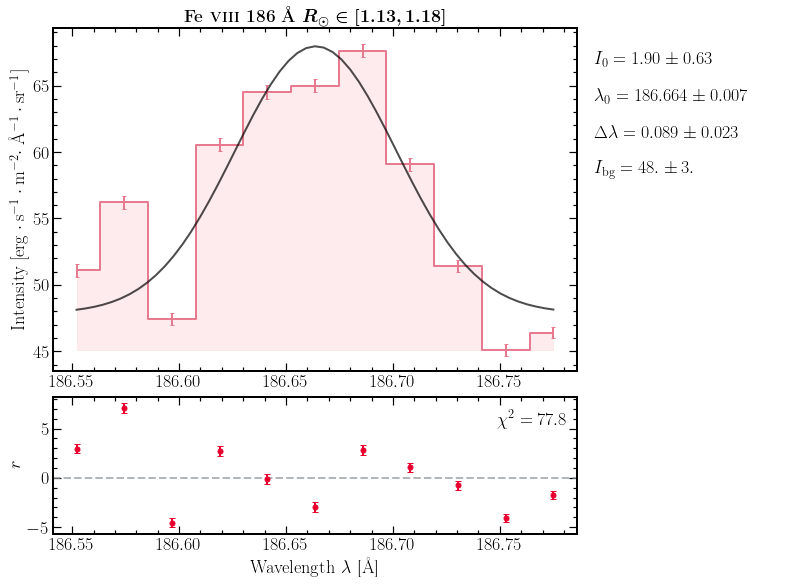

In [22]:
FeVIII_186_fitmodel_r3 = SpectrumFitSingle(data=FeVIII_186_data_aver_r3, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r3,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e1],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r3.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r3.fwhm_fit[0]**2 - FeVIII_186_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

In [23]:
FeXII_186_slice = slice(9,22)
FeXII_186_wvl = wvl_cube_3[FeXII_186_slice]

(FeXII_186_region_1, FeXII_186_region_2,FeXII_186_region_3, 
FeXII_186_slit_width_1, FeXII_186_slit_width_2, FeXII_186_slit_width_3,
FeXII_186_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_3[FeXII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_3)
FeXII_186_data_region_1 = data_cube_3[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_data_region_2 = data_cube_3[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]
FeXII_186_data_region_3 = data_cube_3[FeXII_186_region_3[0],FeXII_186_region_3[1],FeXII_186_slice]
FeXII_186_data_region_sl = data_cube_3[FeXII_186_region_sl[0],FeXII_186_region_sl[1],FeXII_186_slice]

FeXII_186_err_region_1 = err_cube_3[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_err_region_2 = err_cube_3[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]
FeXII_186_err_region_3 = err_cube_3[FeXII_186_region_3[0],FeXII_186_region_3[1],FeXII_186_slice]

FeXII_186_data_aver_r1 = np.nanmean(FeXII_186_data_region_1, axis=0) - 0.02*np.nanmean(FeXII_186_data_region_sl, axis=0)
FeXII_186_data_aver_r2 = np.nanmean(FeXII_186_data_region_2, axis=0) - 0.02*np.nanmean(FeXII_186_data_region_sl, axis=0)
FeXII_186_data_aver_r3 = np.nanmean(FeXII_186_data_region_3, axis=0) - 0.02*np.nanmean(FeXII_186_data_region_sl, axis=0)


FeXII_186_err_aver_r1 = np.sqrt(np.nanmean(FeXII_186_err_region_1**2,axis=0))/np.sqrt(FeXII_186_err_region_1.shape[0])
FeXII_186_err_aver_r2 = np.sqrt(np.nanmean(FeXII_186_err_region_2**2,axis=0))/np.sqrt(FeXII_186_err_region_2.shape[0])
FeXII_186_err_aver_r3 = np.sqrt(np.nanmean(FeXII_186_err_region_3**2,axis=0))/np.sqrt(FeXII_186_err_region_3.shape[0])

Corrected line width 83.3 mÅ
Corrected line width with smaller dlambda inst 89.6 mÅ


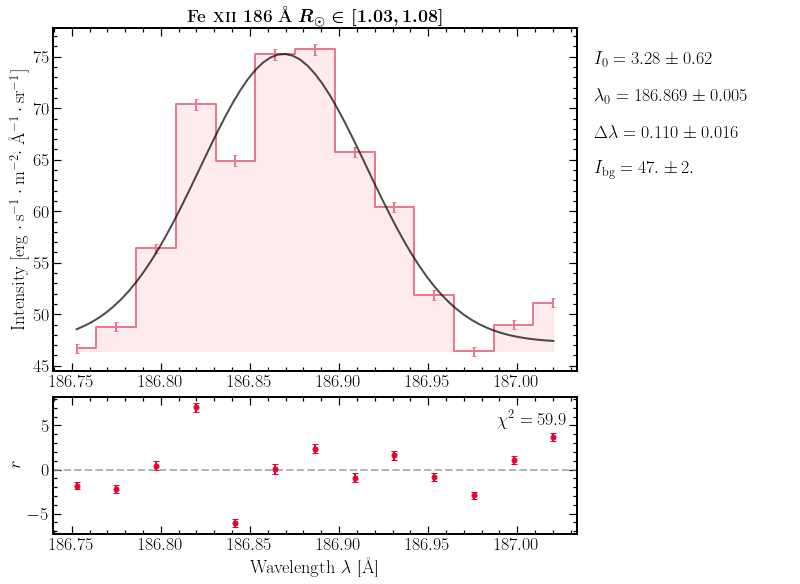

In [24]:
FeXII_186_fitmodel_r1 = SpectrumFitSingle(data=FeXII_186_data_aver_r1, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.85],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_186_fitmodel_r1.fwhm_fit[0]**2 - FeXII_186_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_186_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

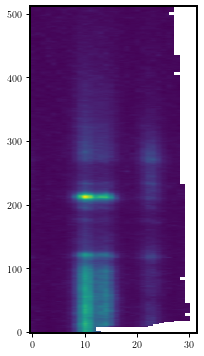

In [25]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_4[:,30,:],origin="lower",aspect="auto")

In [26]:
FeXI_188_slice = slice(0,20)
FeXI_188_wvl = wvl_cube_4[FeXI_188_slice]

(FeXI_188_region_1, FeXI_188_region_2,FeXI_188_region_3, 
FeXI_188_slit_width_1, FeXI_188_slit_width_2, FeXI_188_slit_width_3,
FeXI_188_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_4[FeXI_188_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_4)
FeXI_188_data_region_1 = data_cube_4[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_data_region_2 = data_cube_4[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]
FeXI_188_data_region_3 = data_cube_4[FeXI_188_region_3[0],FeXI_188_region_3[1],FeXI_188_slice]
FeXI_188_data_region_sl = data_cube_4[FeXI_188_region_sl[0],FeXI_188_region_sl[1],FeXI_188_slice]

FeXI_188_err_region_1 = err_cube_4[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_err_region_2 = err_cube_4[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]
FeXI_188_err_region_3 = err_cube_4[FeXI_188_region_3[0],FeXI_188_region_3[1],FeXI_188_slice]

FeXI_188_data_aver_r1 = np.nanmean(FeXI_188_data_region_1, axis=0) - 0.02*np.nanmean(FeXI_188_data_region_sl, axis=0)
FeXI_188_data_aver_r2 = np.nanmean(FeXI_188_data_region_2, axis=0) - 0.02*np.nanmean(FeXI_188_data_region_sl, axis=0)
FeXI_188_data_aver_r3 = np.nanmean(FeXI_188_data_region_3, axis=0) - 0.02*np.nanmean(FeXI_188_data_region_sl, axis=0)


FeXI_188_err_aver_r1 = np.sqrt(np.nanmean(FeXI_188_err_region_1**2,axis=0))/np.sqrt(FeXI_188_err_region_1.shape[0])
FeXI_188_err_aver_r2 = np.sqrt(np.nanmean(FeXI_188_err_region_2**2,axis=0))/np.sqrt(FeXI_188_err_region_2.shape[0])
FeXI_188_err_aver_r3 = np.sqrt(np.nanmean(FeXI_188_err_region_3**2,axis=0))/np.sqrt(FeXI_188_err_region_3.shape[0])

Corrected line width 39.2 mÅ
Corrected line width with smaller dlambda inst 51.2 mÅ


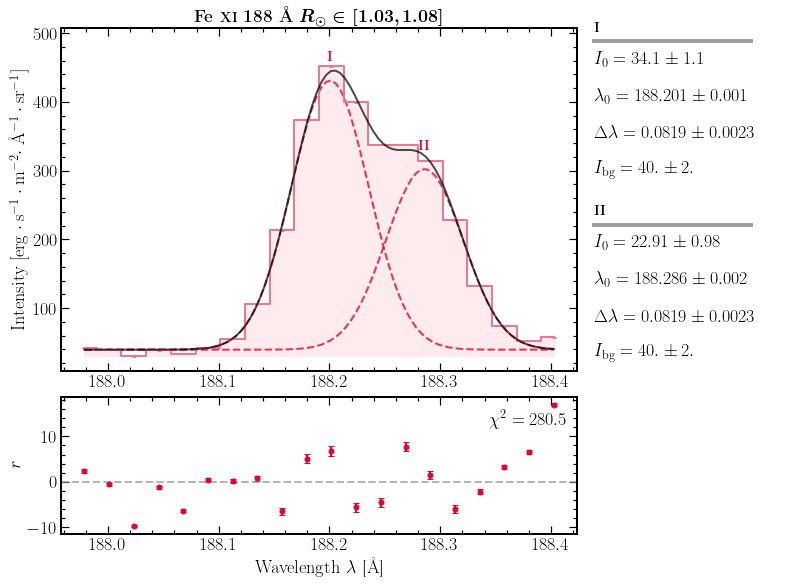

In [27]:
FeXI_188_fitmodel_r1 = SpectrumFitSingle(data=FeXI_188_data_aver_r1, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_r1,
                                        line_number=2,line_wvl_init=[188.2,188.29],int_max_init=[1e2,1e2],fwhm_init=[0.07],
                                        same_width=True)
FeXI_188_fitmodel_r1.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r1.fwhm_fit**2 - FeXI_188_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r1.fwhm_fit**2 - 0.064**2)*1e3))

Corrected line width 47.1 mÅ
Corrected line width with smaller dlambda inst 59.6 mÅ


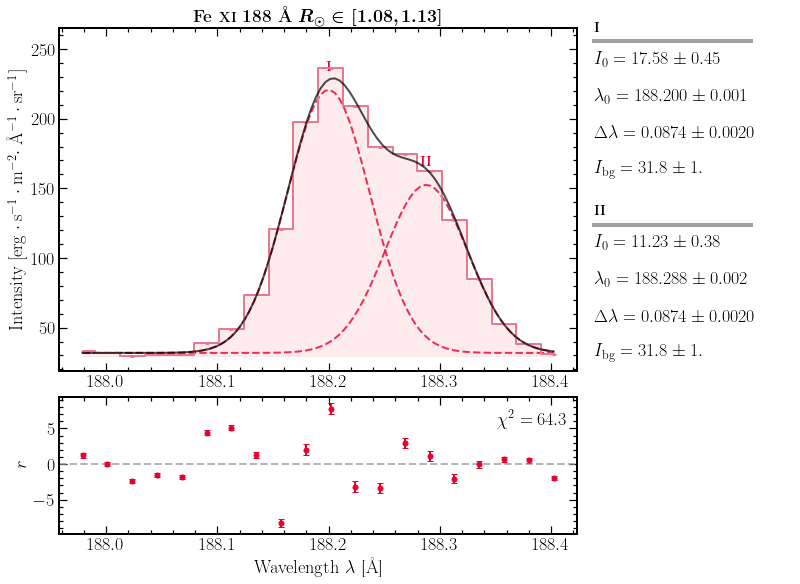

In [28]:
FeXI_188_fitmodel_r2 = SpectrumFitSingle(data=FeXI_188_data_aver_r2, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_r2,
                                        line_number=2,line_wvl_init=[188.2,188.29],int_max_init=[1e2,1e2],fwhm_init=[0.07],
                                        same_width=True)
FeXI_188_fitmodel_r2.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r2.fwhm_fit**2 - FeXI_188_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r2.fwhm_fit**2 - 0.064**2)*1e3))

Corrected line width 33.6 mÅ
Corrected line width with smaller dlambda inst 52.1 mÅ


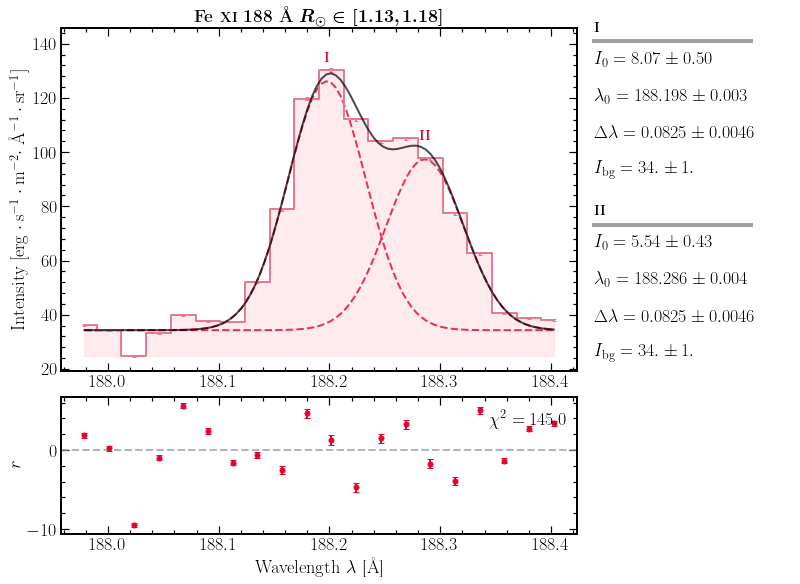

In [29]:
FeXI_188_fitmodel_r3 = SpectrumFitSingle(data=FeXI_188_data_aver_r3, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_r3,
                                        line_number=2,line_wvl_init=[188.2,188.29],int_max_init=[1e2,1e2],fwhm_init=[0.07],
                                        same_width=True)
FeXI_188_fitmodel_r3.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r3.fwhm_fit**2 - FeXI_188_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r3.fwhm_fit**2 - 0.064**2)*1e3))

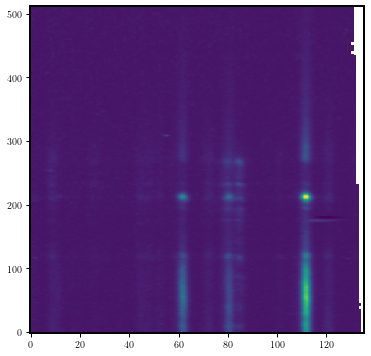

In [30]:
fig, ax =plt.subplots(figsize=(6,6))
ax.imshow(data_cube_5[:,30,:],origin="lower",aspect="auto")

In [31]:
FeXII_192_slice = slice(55,69)
FeXII_192_wvl = wvl_cube_5[FeXII_192_slice]

(FeXII_192_region_1, FeXII_192_region_2,FeXII_192_region_3, 
FeXII_192_slit_width_1, FeXII_192_slit_width_2, FeXII_192_slit_width_3,
FeXII_192_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_5[FeXII_192_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_5)
FeXII_192_data_region_1 = data_cube_5[FeXII_192_region_1[0],FeXII_192_region_1[1],FeXII_192_slice]
FeXII_192_data_region_2 = data_cube_5[FeXII_192_region_2[0],FeXII_192_region_2[1],FeXII_192_slice]
FeXII_192_data_region_3 = data_cube_5[FeXII_192_region_3[0],FeXII_192_region_3[1],FeXII_192_slice]
FeXII_192_data_region_sl = data_cube_5[FeXII_192_region_sl[0],FeXII_192_region_sl[1],FeXII_192_slice]

FeXII_192_err_region_1 = err_cube_5[FeXII_192_region_1[0],FeXII_192_region_1[1],FeXII_192_slice]
FeXII_192_err_region_2 = err_cube_5[FeXII_192_region_2[0],FeXII_192_region_2[1],FeXII_192_slice]
FeXII_192_err_region_3 = err_cube_5[FeXII_192_region_3[0],FeXII_192_region_3[1],FeXII_192_slice]

FeXII_192_data_aver_r1 = np.nanmean(FeXII_192_data_region_1, axis=0) - 0.02*np.nanmean(FeXII_192_data_region_sl, axis=0)
FeXII_192_data_aver_r2 = np.nanmean(FeXII_192_data_region_2, axis=0) - 0.02*np.nanmean(FeXII_192_data_region_sl, axis=0)
FeXII_192_data_aver_r3 = np.nanmean(FeXII_192_data_region_3, axis=0) - 0.02*np.nanmean(FeXII_192_data_region_sl, axis=0)


FeXII_192_err_aver_r1 = np.sqrt(np.nanmean(FeXII_192_err_region_1**2,axis=0))/np.sqrt(FeXII_192_err_region_1.shape[0])
FeXII_192_err_aver_r2 = np.sqrt(np.nanmean(FeXII_192_err_region_2**2,axis=0))/np.sqrt(FeXII_192_err_region_2.shape[0])
FeXII_192_err_aver_r3 = np.sqrt(np.nanmean(FeXII_192_err_region_3**2,axis=0))/np.sqrt(FeXII_192_err_region_3.shape[0])

Corrected line width 34.5 mÅ
Corrected line width with smaller dlambda inst 47.7 mÅ


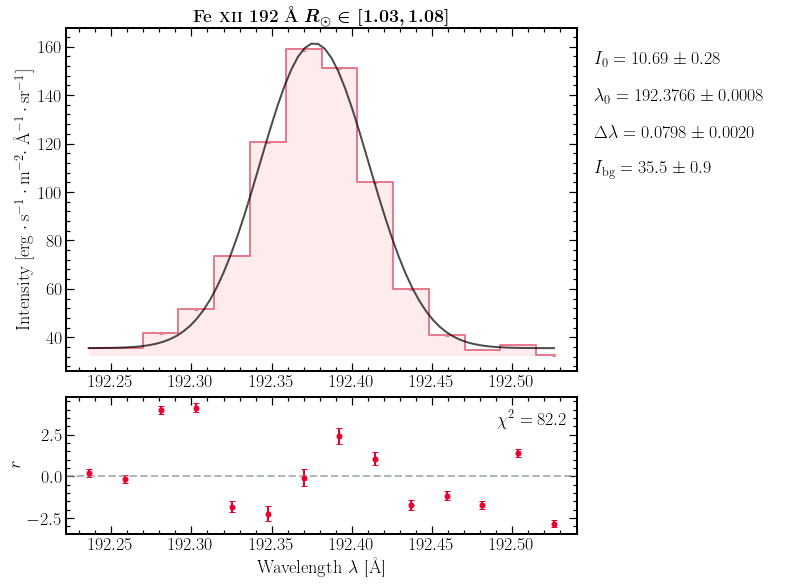

In [32]:
FeXII_192_fitmodel_r1 = SpectrumFitSingle(data=FeXII_192_data_aver_r1, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_r1,
                                        line_number=1,line_wvl_init=[192.4],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_192_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r1.fwhm_fit[0]**2 - FeXII_192_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 44.0 mÅ
Corrected line width with smaller dlambda inst 57.1 mÅ


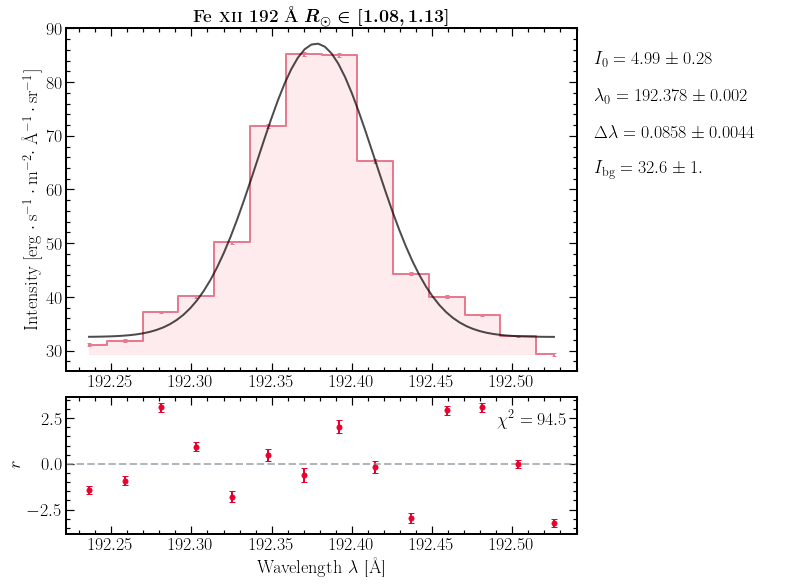

In [33]:
FeXII_192_fitmodel_r2 = SpectrumFitSingle(data=FeXII_192_data_aver_r2, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_r2,
                                        line_number=1,line_wvl_init=[192.4],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXII_192_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r2.fwhm_fit[0]**2 - FeXII_192_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 48.4 mÅ
Corrected line width with smaller dlambda inst 62.7 mÅ


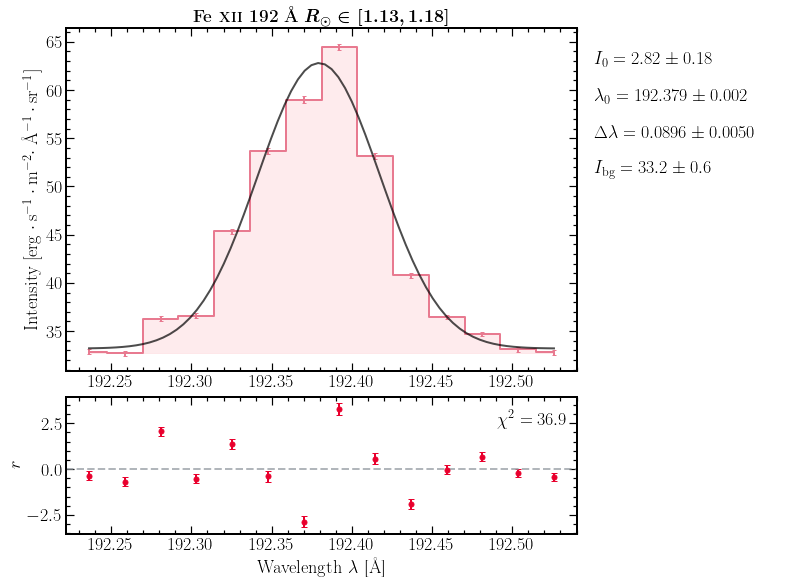

In [34]:
FeXII_192_fitmodel_r3 = SpectrumFitSingle(data=FeXII_192_data_aver_r3, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_r3,
                                        line_number=1,line_wvl_init=[192.4],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXII_192_fitmodel_r3.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r3.fwhm_fit[0]**2 - FeXII_192_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

In [35]:
FeXII_193_slice = slice(105,118)
FeXII_193_wvl = wvl_cube_5[FeXII_193_slice]

(FeXII_193_region_1, FeXII_193_region_2,FeXII_193_region_3, 
FeXII_193_slit_width_1, FeXII_193_slit_width_2, FeXII_193_slit_width_3,
FeXII_193_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_5[FeXII_193_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_5)
FeXII_193_data_region_1 = data_cube_5[FeXII_193_region_1[0],FeXII_193_region_1[1],FeXII_193_slice]
FeXII_193_data_region_2 = data_cube_5[FeXII_193_region_2[0],FeXII_193_region_2[1],FeXII_193_slice]
FeXII_193_data_region_3 = data_cube_5[FeXII_193_region_3[0],FeXII_193_region_3[1],FeXII_193_slice]
FeXII_193_data_region_sl = data_cube_5[FeXII_193_region_sl[0],FeXII_193_region_sl[1],FeXII_193_slice]

FeXII_193_err_region_1 = err_cube_5[FeXII_193_region_1[0],FeXII_193_region_1[1],FeXII_193_slice]
FeXII_193_err_region_2 = err_cube_5[FeXII_193_region_2[0],FeXII_193_region_2[1],FeXII_193_slice]
FeXII_193_err_region_3 = err_cube_5[FeXII_193_region_3[0],FeXII_193_region_3[1],FeXII_193_slice]

FeXII_193_data_aver_r1 = np.nanmean(FeXII_193_data_region_1, axis=0) - 0.02*np.nanmean(FeXII_193_data_region_sl, axis=0)
FeXII_193_data_aver_r2 = np.nanmean(FeXII_193_data_region_2, axis=0) - 0.02*np.nanmean(FeXII_193_data_region_sl, axis=0)
FeXII_193_data_aver_r3 = np.nanmean(FeXII_193_data_region_3, axis=0) - 0.02*np.nanmean(FeXII_193_data_region_sl, axis=0)


FeXII_193_err_aver_r1 = np.sqrt(np.nanmean(FeXII_193_err_region_1**2,axis=0))/np.sqrt(FeXII_193_err_region_1.shape[0])
FeXII_193_err_aver_r2 = np.sqrt(np.nanmean(FeXII_193_err_region_2**2,axis=0))/np.sqrt(FeXII_193_err_region_2.shape[0])
FeXII_193_err_aver_r3 = np.sqrt(np.nanmean(FeXII_193_err_region_3**2,axis=0))/np.sqrt(FeXII_193_err_region_3.shape[0])

Corrected line width 33.3 mÅ
Corrected line width with smaller dlambda inst 46.8 mÅ


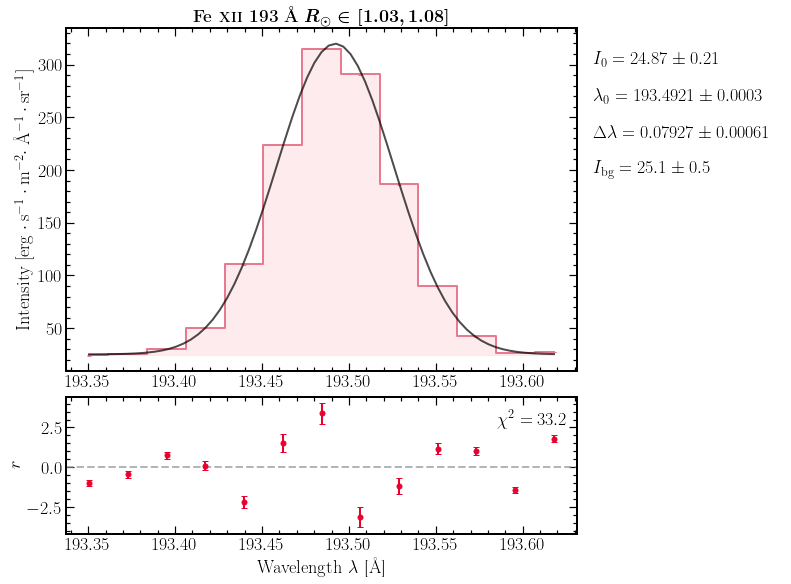

In [36]:
FeXII_193_fitmodel_r1 = SpectrumFitSingle(data=FeXII_193_data_aver_r1, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_r1,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_193_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r1.fwhm_fit[0]**2 - FeXII_193_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 31.3 mÅ
Corrected line width with smaller dlambda inst 48.0 mÅ


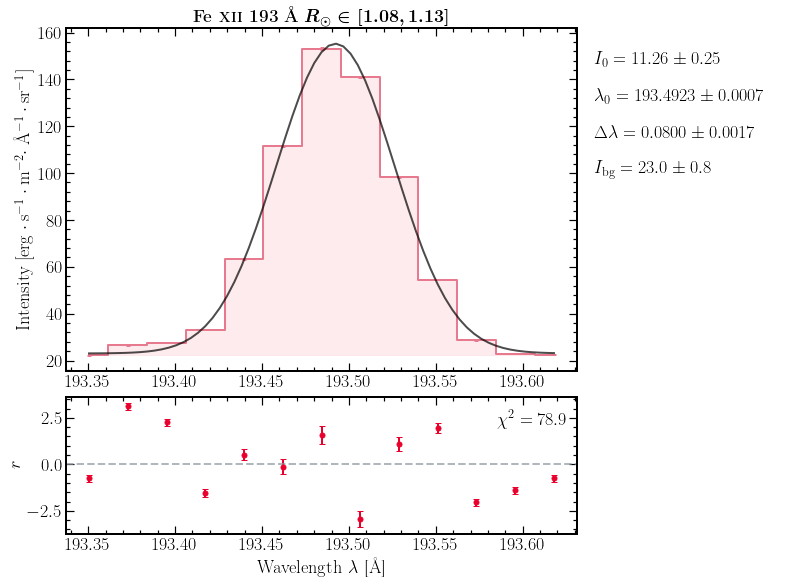

In [37]:
FeXII_193_fitmodel_r2 = SpectrumFitSingle(data=FeXII_193_data_aver_r2, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_r2,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_193_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r2.fwhm_fit[0]**2 - FeXII_193_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 41.4 mÅ
Corrected line width with smaller dlambda inst 57.4 mÅ


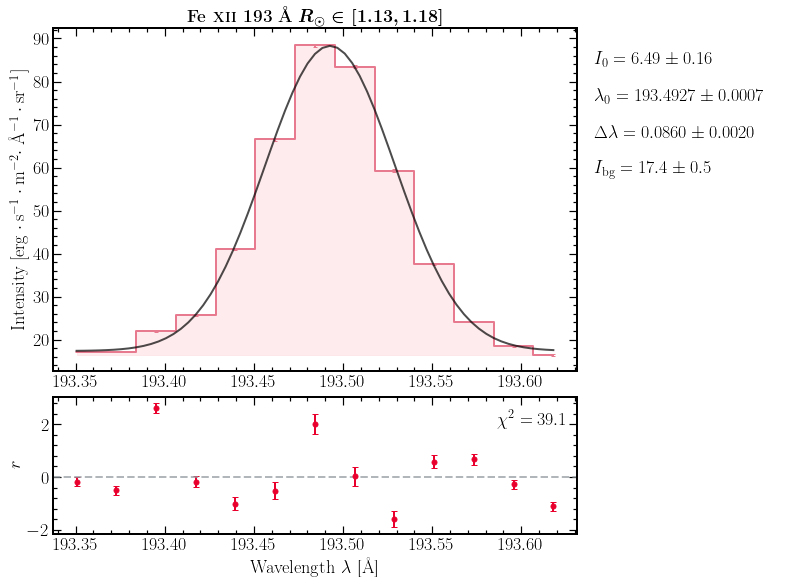

In [38]:
FeXII_193_fitmodel_r3 = SpectrumFitSingle(data=FeXII_193_data_aver_r3, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_r3,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXII_193_fitmodel_r3.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r3.fwhm_fit[0]**2 - FeXII_193_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

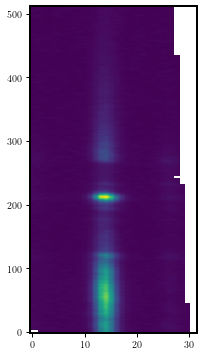

In [39]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_6[:,30,:],origin="lower",aspect="auto")

In [40]:
FeXII_195_slice = slice(5,23)
FeXII_195_wvl = wvl_cube_6[FeXII_195_slice]

(FeXII_195_region_1, FeXII_195_region_2,FeXII_195_region_3, 
FeXII_195_slit_width_1, FeXII_195_slit_width_2, FeXII_195_slit_width_3,
FeXII_195_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_6[FeXII_195_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_6)
FeXII_195_data_region_1 = data_cube_6[FeXII_195_region_1[0],FeXII_195_region_1[1],FeXII_195_slice]
FeXII_195_data_region_2 = data_cube_6[FeXII_195_region_2[0],FeXII_195_region_2[1],FeXII_195_slice]
FeXII_195_data_region_3 = data_cube_6[FeXII_195_region_3[0],FeXII_195_region_3[1],FeXII_195_slice]
FeXII_195_data_region_sl = data_cube_6[FeXII_195_region_sl[0],FeXII_195_region_sl[1],FeXII_195_slice]

FeXII_195_err_region_1 = err_cube_6[FeXII_195_region_1[0],FeXII_195_region_1[1],FeXII_195_slice]
FeXII_195_err_region_2 = err_cube_6[FeXII_195_region_2[0],FeXII_195_region_2[1],FeXII_195_slice]
FeXII_195_err_region_3 = err_cube_6[FeXII_195_region_3[0],FeXII_195_region_3[1],FeXII_195_slice]

FeXII_195_data_aver_r1 = np.nanmean(FeXII_195_data_region_1, axis=0) - 0.02*np.nanmean(FeXII_195_data_region_sl, axis=0)
FeXII_195_data_aver_r2 = np.nanmean(FeXII_195_data_region_2, axis=0) - 0.02*np.nanmean(FeXII_195_data_region_sl, axis=0)
FeXII_195_data_aver_r3 = np.nanmean(FeXII_195_data_region_3, axis=0) - 0.02*np.nanmean(FeXII_195_data_region_sl, axis=0)


FeXII_195_err_aver_r1 = np.sqrt(np.nanmean(FeXII_195_err_region_1**2,axis=0))/np.sqrt(FeXII_195_err_region_1.shape[0])
FeXII_195_err_aver_r2 = np.sqrt(np.nanmean(FeXII_195_err_region_2**2,axis=0))/np.sqrt(FeXII_195_err_region_2.shape[0])
FeXII_195_err_aver_r3 = np.sqrt(np.nanmean(FeXII_195_err_region_3**2,axis=0))/np.sqrt(FeXII_195_err_region_3.shape[0])

Corrected line width 39.8 mÅ
Corrected line width with smaller dlambda inst 51.6 mÅ


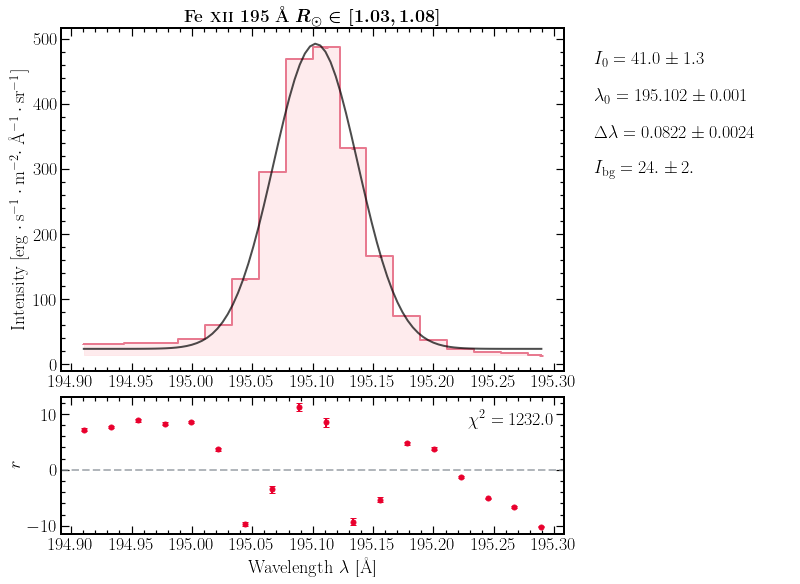

In [41]:
FeXII_195_fitmodel_r1 = SpectrumFitSingle(data=FeXII_195_data_aver_r1, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r1,
                                        line_number=1,line_wvl_init=[195.12],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_195_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r1.fwhm_fit[0]**2 - FeXII_195_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 42.6 mÅ
Corrected line width with smaller dlambda inst 56.0 mÅ


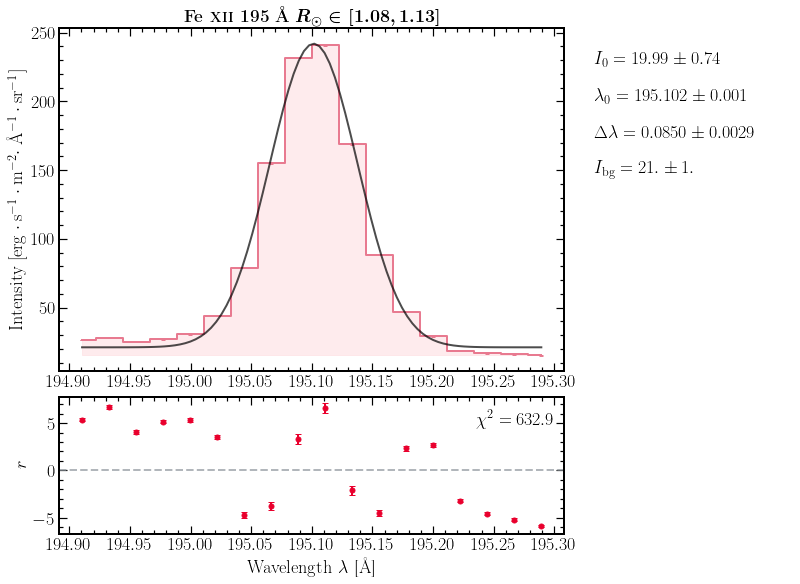

In [42]:
FeXII_195_fitmodel_r2 = SpectrumFitSingle(data=FeXII_195_data_aver_r2, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r2,
                                        line_number=1,line_wvl_init=[195.12],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_195_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r2.fwhm_fit[0]**2 - FeXII_195_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 41.6 mÅ
Corrected line width with smaller dlambda inst 57.6 mÅ


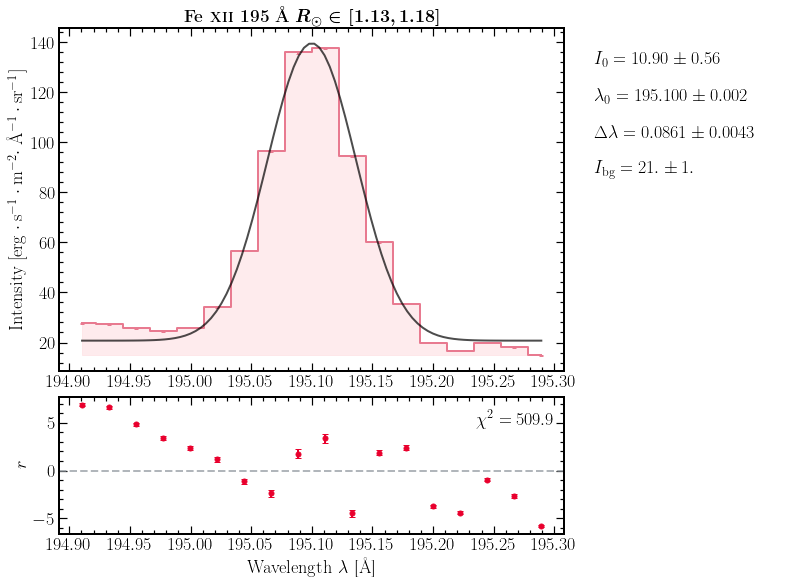

In [43]:
FeXII_195_fitmodel_r3 = SpectrumFitSingle(data=FeXII_195_data_aver_r3, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r3,
                                        line_number=1,line_wvl_init=[195.12],int_max_init=[2e2],fwhm_init=[0.07],
                                        )
FeXII_195_fitmodel_r3.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r3.fwhm_fit[0]**2 - FeXII_195_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

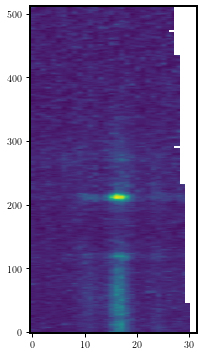

In [44]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_7[:,30,:],origin="lower",aspect="auto")

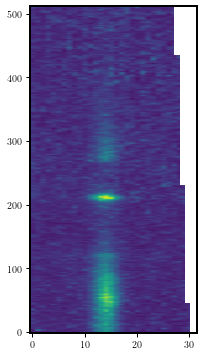

In [45]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_8[:,30,:],origin="lower",aspect="auto")

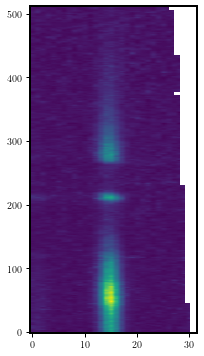

In [46]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_9[:,30,:],origin="lower",aspect="auto")

In [47]:
FeXIII_202_slice = slice(5,23)
FeXIII_202_wvl = wvl_cube_9[FeXIII_202_slice]

(FeXIII_202_region_1, FeXIII_202_region_2,FeXIII_202_region_3, 
FeXIII_202_slit_width_1, FeXIII_202_slit_width_2, FeXIII_202_slit_width_3,
FeXIII_202_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_9[FeXIII_202_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_9)
FeXIII_202_data_region_1 = data_cube_9[FeXIII_202_region_1[0],FeXIII_202_region_1[1],FeXIII_202_slice]
FeXIII_202_data_region_2 = data_cube_9[FeXIII_202_region_2[0],FeXIII_202_region_2[1],FeXIII_202_slice]
FeXIII_202_data_region_3 = data_cube_9[FeXIII_202_region_3[0],FeXIII_202_region_3[1],FeXIII_202_slice]
FeXIII_202_data_region_sl = data_cube_9[FeXIII_202_region_sl[0],FeXIII_202_region_sl[1],FeXIII_202_slice]

FeXIII_202_err_region_1 = err_cube_9[FeXIII_202_region_1[0],FeXIII_202_region_1[1],FeXIII_202_slice]
FeXIII_202_err_region_2 = err_cube_9[FeXIII_202_region_2[0],FeXIII_202_region_2[1],FeXIII_202_slice]
FeXIII_202_err_region_3 = err_cube_9[FeXIII_202_region_3[0],FeXIII_202_region_3[1],FeXIII_202_slice]

FeXIII_202_data_aver_r1 = np.nanmean(FeXIII_202_data_region_1, axis=0) - 0.02*np.nanmean(FeXIII_202_data_region_sl, axis=0)
FeXIII_202_data_aver_r2 = np.nanmean(FeXIII_202_data_region_2, axis=0) - 0.02*np.nanmean(FeXIII_202_data_region_sl, axis=0)
FeXIII_202_data_aver_r3 = np.nanmean(FeXIII_202_data_region_3, axis=0) - 0.02*np.nanmean(FeXIII_202_data_region_sl, axis=0)


FeXIII_202_err_aver_r1 = np.sqrt(np.nanmean(FeXIII_202_err_region_1**2,axis=0))/np.sqrt(FeXIII_202_err_region_1.shape[0])
FeXIII_202_err_aver_r2 = np.sqrt(np.nanmean(FeXIII_202_err_region_2**2,axis=0))/np.sqrt(FeXIII_202_err_region_2.shape[0])
FeXIII_202_err_aver_r3 = np.sqrt(np.nanmean(FeXIII_202_err_region_3**2,axis=0))/np.sqrt(FeXIII_202_err_region_3.shape[0])

Corrected line width 35.3 mÅ
Corrected line width with smaller dlambda inst 48.1 mÅ


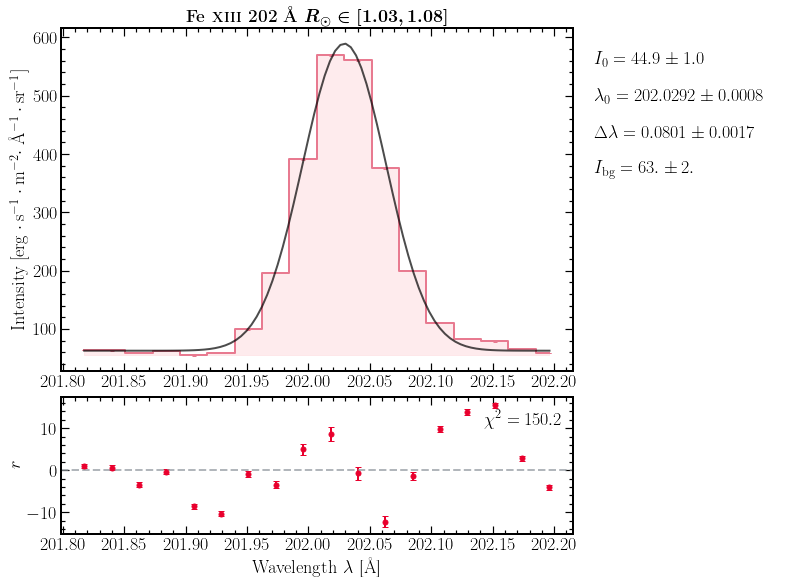

In [48]:
FeXIII_202_fitmodel_r1 = SpectrumFitSingle(data=FeXIII_202_data_aver_r1, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_r1,
                                        line_number=1,line_wvl_init=[202.0],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXIII_202_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r1.fwhm_fit[0]**2 - FeXIII_202_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 26.5 mÅ
Corrected line width with smaller dlambda inst 45.0 mÅ


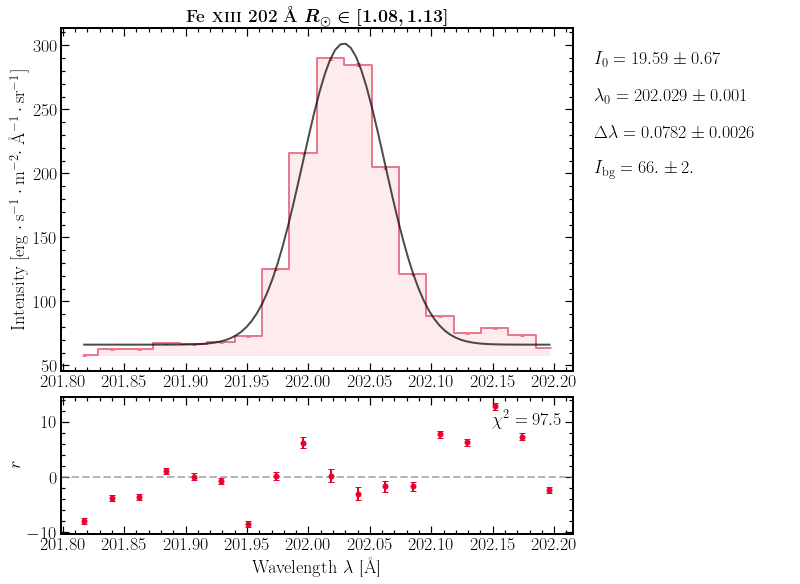

In [49]:
FeXIII_202_fitmodel_r2 = SpectrumFitSingle(data=FeXIII_202_data_aver_r2, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_r2,
                                        line_number=1,line_wvl_init=[202.0],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXIII_202_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r2.fwhm_fit[0]**2 - FeXIII_202_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

Corrected line width 51.6 mÅ
Corrected line width with smaller dlambda inst 65.1 mÅ


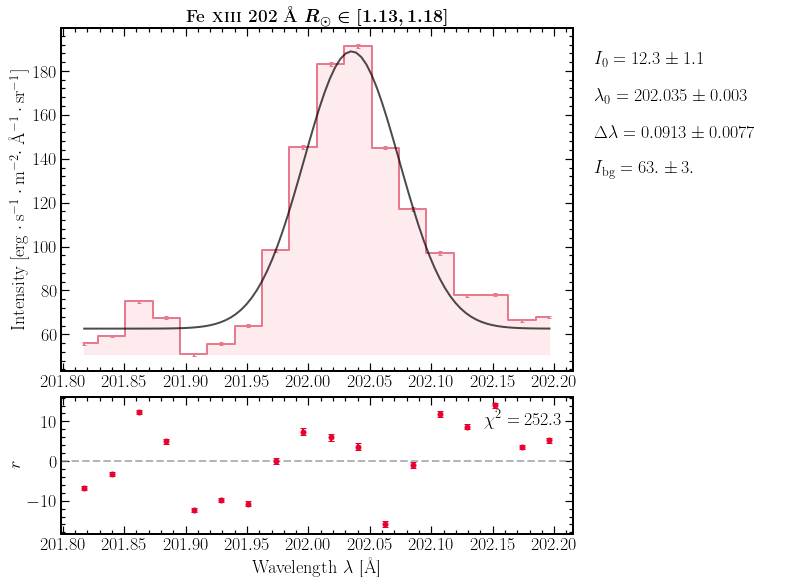

In [50]:
FeXIII_202_fitmodel_r3 = SpectrumFitSingle(data=FeXIII_202_data_aver_r3, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_r3,
                                        line_number=1,line_wvl_init=[202.0],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
FeXIII_202_fitmodel_r3.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_r3.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.13,1.18]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r3.fwhm_fit[0]**2 - FeXIII_202_slit_width_3**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r3.fwhm_fit[0]**2 - 0.064**2)*1e3))

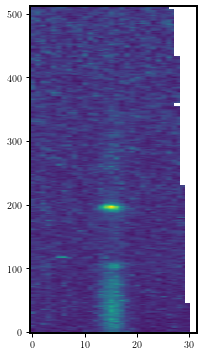

In [51]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_13[:,30,:],origin="lower",aspect="auto")

In [52]:
SiX_258_slice = slice(5,23)
SiX_258_wvl = wvl_cube_13[SiX_258_slice]

(SiX_258_region_1, SiX_258_region_2,SiX_258_region_3, 
SiX_258_slit_width_1, SiX_258_slit_width_2, SiX_258_slit_width_3,
SiX_258_region_sl) = \
return_mask_and_slitwidth(np.mean(ccd_offset_13[SiX_258_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_13)
SiX_258_data_region_1 = data_cube_13[SiX_258_region_1[0],SiX_258_region_1[1],SiX_258_slice]
SiX_258_data_region_2 = data_cube_13[SiX_258_region_2[0],SiX_258_region_2[1],SiX_258_slice]
SiX_258_data_region_3 = data_cube_13[SiX_258_region_3[0],SiX_258_region_3[1],SiX_258_slice]
SiX_258_data_region_sl = data_cube_13[SiX_258_region_sl[0],SiX_258_region_sl[1],SiX_258_slice]

SiX_258_err_region_1 = err_cube_13[SiX_258_region_1[0],SiX_258_region_1[1],SiX_258_slice]
SiX_258_err_region_2 = err_cube_13[SiX_258_region_2[0],SiX_258_region_2[1],SiX_258_slice]
SiX_258_err_region_3 = err_cube_13[SiX_258_region_3[0],SiX_258_region_3[1],SiX_258_slice]

SiX_258_data_aver_r1 = np.nanmean(SiX_258_data_region_1, axis=0) - 0.02*np.nanmean(SiX_258_data_region_sl, axis=0)
SiX_258_data_aver_r2 = np.nanmean(SiX_258_data_region_2, axis=0) - 0.02*np.nanmean(SiX_258_data_region_sl, axis=0)
SiX_258_data_aver_r3 = np.nanmean(SiX_258_data_region_3, axis=0) - 0.02*np.nanmean(SiX_258_data_region_sl, axis=0)


SiX_258_err_aver_r1 = np.sqrt(np.nanmean(SiX_258_err_region_1**2,axis=0))/np.sqrt(SiX_258_err_region_1.shape[0])
SiX_258_err_aver_r2 = np.sqrt(np.nanmean(SiX_258_err_region_2**2,axis=0))/np.sqrt(SiX_258_err_region_2.shape[0])
SiX_258_err_aver_r3 = np.sqrt(np.nanmean(SiX_258_err_region_3**2,axis=0))/np.sqrt(SiX_258_err_region_3.shape[0])

Corrected line width 40.3 mÅ
Corrected line width with smaller dlambda inst 51.3 mÅ


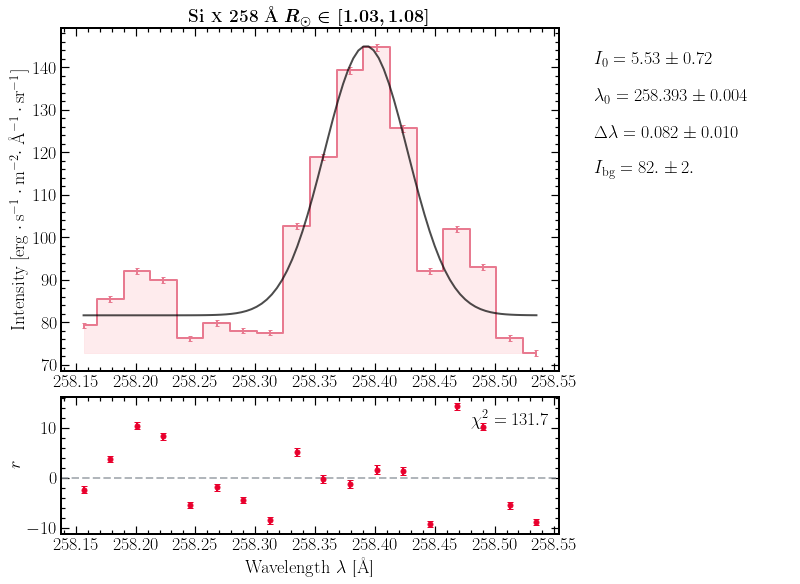

In [53]:
SiX_258_fitmodel_r1 = SpectrumFitSingle(data=SiX_258_data_aver_r1, wvl=SiX_258_wvl,err=SiX_258_err_aver_r1,
                                        line_number=1,line_wvl_init=[258.38],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
SiX_258_fitmodel_r1.run_lse(absolute_sigma=False)
SiX_258_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r1.fwhm_fit[0]**2 - SiX_258_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Corrected line width nan mÅ
Corrected line width with smaller dlambda inst nan mÅ


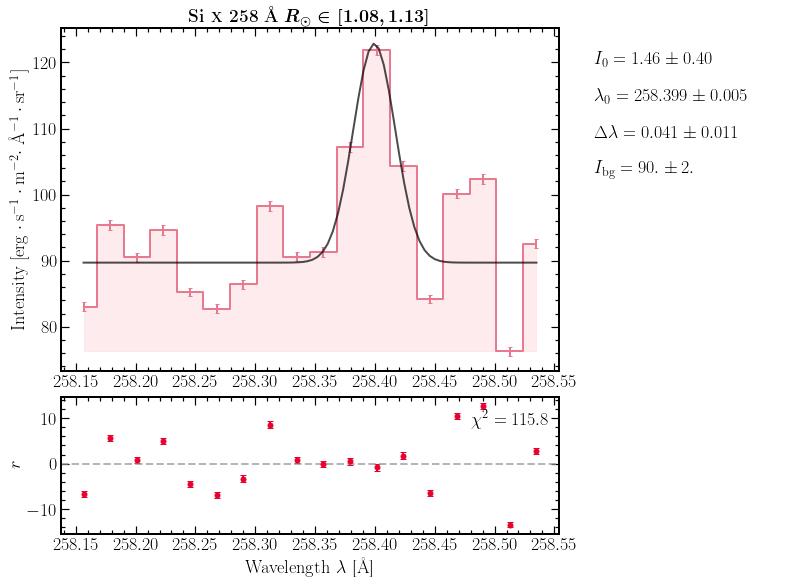

In [54]:
SiX_258_fitmodel_r2 = SpectrumFitSingle(data=SiX_258_data_aver_r2, wvl=SiX_258_wvl,err=SiX_258_err_aver_r2,
                                        line_number=1,line_wvl_init=[258.38],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
SiX_258_fitmodel_r2.run_lse(absolute_sigma=False)
SiX_258_fitmodel_r2.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.08,1.13]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r2.fwhm_fit[0]**2 - SiX_258_slit_width_2**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r2.fwhm_fit[0]**2 - 0.064**2)*1e3))

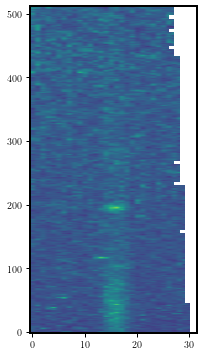

In [55]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_14[:,30,:],origin="lower",aspect="auto")

In [56]:
SiX_261_slice = slice(7,23)
SiX_261_wvl = wvl_cube_14[SiX_261_slice]

(SiX_261_region_1, SiX_261_region_2,SiX_261_region_3, 
SiX_261_slit_width_1, SiX_261_slit_width_2, SiX_261_slit_width_3,
_) = \
return_mask_and_slitwidth(np.mean(ccd_offset_14[SiX_261_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_14)
SiX_261_data_region_1 = data_cube_14[SiX_261_region_1[0],SiX_261_region_1[1],SiX_261_slice]
SiX_261_data_region_2 = data_cube_14[SiX_261_region_2[0],SiX_261_region_2[1],SiX_261_slice]
SiX_261_data_region_3 = data_cube_14[SiX_261_region_3[0],SiX_261_region_3[1],SiX_261_slice]

SiX_261_err_region_1 = err_cube_14[SiX_261_region_1[0],SiX_261_region_1[1],SiX_261_slice]
SiX_261_err_region_2 = err_cube_14[SiX_261_region_2[0],SiX_261_region_2[1],SiX_261_slice]
SiX_261_err_region_3 = err_cube_14[SiX_261_region_3[0],SiX_261_region_3[1],SiX_261_slice]

SiX_261_data_aver_r1 = np.nanmean(SiX_261_data_region_1, axis=0)
SiX_261_data_aver_r2 = np.nanmean(SiX_261_data_region_2, axis=0)
SiX_261_data_aver_r3 = np.nanmean(SiX_261_data_region_3, axis=0)


SiX_261_err_aver_r1 = np.sqrt(np.nanmean(SiX_261_err_region_1**2,axis=0))/np.sqrt(SiX_261_err_region_1.shape[0])
SiX_261_err_aver_r2 = np.sqrt(np.nanmean(SiX_261_err_region_2**2,axis=0))/np.sqrt(SiX_261_err_region_2.shape[0])
SiX_261_err_aver_r3 = np.sqrt(np.nanmean(SiX_261_err_region_3**2,axis=0))/np.sqrt(SiX_261_err_region_3.shape[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Corrected line width nan mÅ
Corrected line width with smaller dlambda inst 29.6 mÅ


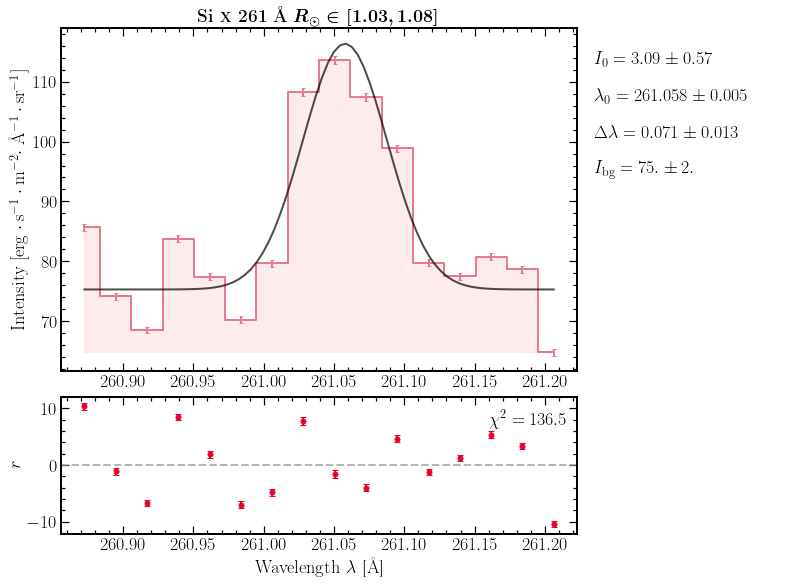

In [57]:
SiX_261_fitmodel_r1 = SpectrumFitSingle(data=SiX_261_data_aver_r1, wvl=SiX_261_wvl,err=SiX_261_err_aver_r1,
                                        line_number=1,line_wvl_init=[261.05],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
SiX_261_fitmodel_r1.run_lse(absolute_sigma=False)
SiX_261_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_261_fitmodel_r1.fwhm_fit[0]**2 - SiX_261_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(SiX_261_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

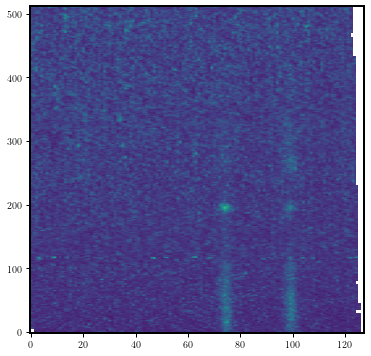

In [58]:
fig, ax =plt.subplots(figsize=(6,6))
ax.imshow(data_cube_15[:,30,:],origin="lower",aspect="auto")

In [59]:
SX_264_slice = slice(65,85)
SX_264_wvl = wvl_cube_15[SX_264_slice]

(SX_264_region_1, SX_264_region_2,SX_264_region_3, 
SX_264_slit_width_1, SX_264_slit_width_2, SX_264_slit_width_3,
_) = \
return_mask_and_slitwidth(np.mean(ccd_offset_15[SX_264_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_15)
SX_264_data_region_1 = data_cube_15[SX_264_region_1[0],SX_264_region_1[1],SX_264_slice]
SX_264_data_region_2 = data_cube_15[SX_264_region_2[0],SX_264_region_2[1],SX_264_slice]
SX_264_data_region_3 = data_cube_15[SX_264_region_3[0],SX_264_region_3[1],SX_264_slice]

SX_264_err_region_1 = err_cube_15[SX_264_region_1[0],SX_264_region_1[1],SX_264_slice]
SX_264_err_region_2 = err_cube_15[SX_264_region_2[0],SX_264_region_2[1],SX_264_slice]
SX_264_err_region_3 = err_cube_15[SX_264_region_3[0],SX_264_region_3[1],SX_264_slice]

SX_264_data_aver_r1 = np.nanmean(SX_264_data_region_1, axis=0)
SX_264_data_aver_r2 = np.nanmean(SX_264_data_region_2, axis=0)
SX_264_data_aver_r3 = np.nanmean(SX_264_data_region_3, axis=0)


SX_264_err_aver_r1 = np.sqrt(np.nanmean(SX_264_err_region_1**2,axis=0))/np.sqrt(SX_264_err_region_1.shape[0])
SX_264_err_aver_r2 = np.sqrt(np.nanmean(SX_264_err_region_2**2,axis=0))/np.sqrt(SX_264_err_region_2.shape[0])
SX_264_err_aver_r3 = np.sqrt(np.nanmean(SX_264_err_region_3**2,axis=0))/np.sqrt(SX_264_err_region_3.shape[0])

Corrected line width 57.3 mÅ
Corrected line width with smaller dlambda inst 65.4 mÅ


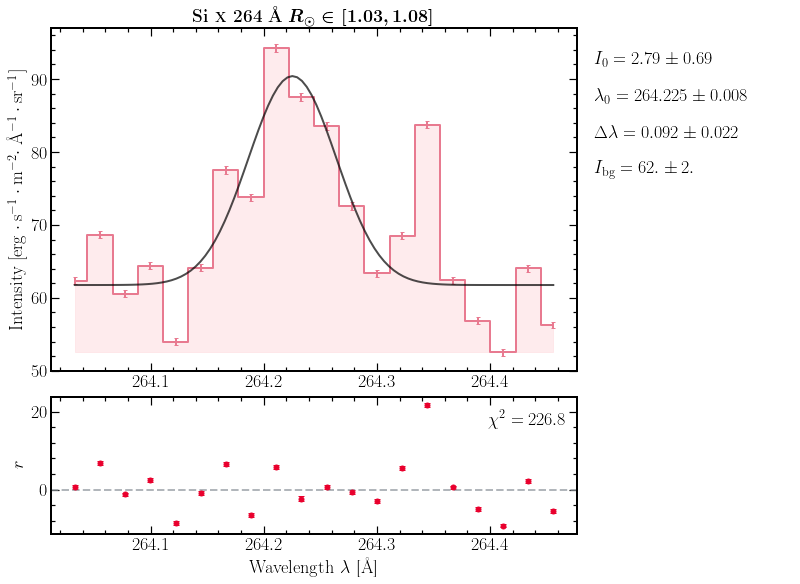

In [60]:
SX_264_fitmodel_r1 = SpectrumFitSingle(data=SX_264_data_aver_r1, wvl=SX_264_wvl,err=SX_264_err_aver_r1,
                                        line_number=1,line_wvl_init=[264.25],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
SX_264_fitmodel_r1.run_lse(absolute_sigma=False)
SX_264_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SX_264_fitmodel_r1.fwhm_fit[0]**2 - SX_264_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(SX_264_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

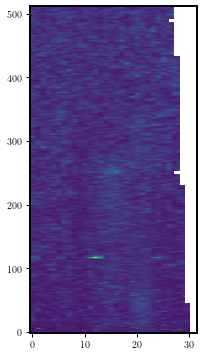

In [61]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_16[:,30,:],origin="lower",aspect="auto")

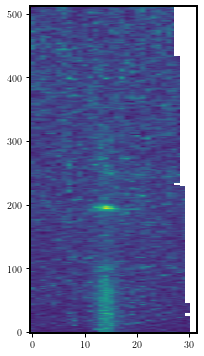

In [62]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_17[:,30,:],origin="lower",aspect="auto")

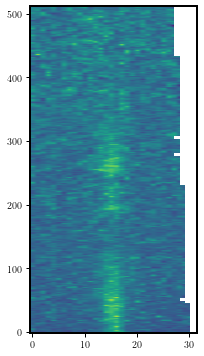

In [63]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_18[:,30,:],origin="lower",aspect="auto")

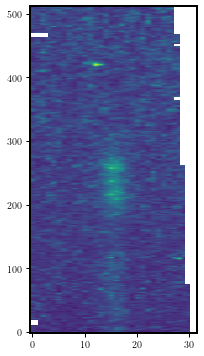

In [64]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_19[:,23,:],origin="lower",aspect="auto")

In [65]:
SiVII_275_slice = slice(12,25)
SiVII_275_wvl = wvl_cube_19[SiVII_275_slice]

(SiVII_275_region_1, SiVII_275_region_2,SiVII_275_region_3, 
SiVII_275_slit_width_1, SiVII_275_slit_width_2, SiVII_275_slit_width_3,
_) = \
return_mask_and_slitwidth(np.mean(ccd_offset_19[SiVII_275_slice]), ccd_offset_FeXII, fexii_195_bottom_left,slit_width_19)
SiVII_275_data_region_1 = data_cube_19[SiVII_275_region_1[0],SiVII_275_region_1[1],SiVII_275_slice]
SiVII_275_data_region_2 = data_cube_19[SiVII_275_region_2[0],SiVII_275_region_2[1],SiVII_275_slice]
SiVII_275_data_region_3 = data_cube_19[SiVII_275_region_3[0],SiVII_275_region_3[1],SiVII_275_slice]

SiVII_275_err_region_1 = err_cube_19[SiVII_275_region_1[0],SiVII_275_region_1[1],SiVII_275_slice]
SiVII_275_err_region_2 = err_cube_19[SiVII_275_region_2[0],SiVII_275_region_2[1],SiVII_275_slice]
SiVII_275_err_region_3 = err_cube_19[SiVII_275_region_3[0],SiVII_275_region_3[1],SiVII_275_slice]

SiVII_275_data_aver_r1 = np.nanmean(SiVII_275_data_region_1, axis=0)
SiVII_275_data_aver_r2 = np.nanmean(SiVII_275_data_region_2, axis=0)
SiVII_275_data_aver_r3 = np.nanmean(SiVII_275_data_region_3, axis=0)


SiVII_275_err_aver_r1 = np.sqrt(np.nanmean(SiVII_275_err_region_1**2,axis=0))/np.sqrt(SiVII_275_err_region_1.shape[0])
SiVII_275_err_aver_r2 = np.sqrt(np.nanmean(SiVII_275_err_region_2**2,axis=0))/np.sqrt(SiVII_275_err_region_2.shape[0])
SiVII_275_err_aver_r3 = np.sqrt(np.nanmean(SiVII_275_err_region_3**2,axis=0))/np.sqrt(SiVII_275_err_region_3.shape[0])

Corrected line width 62.5 mÅ
Corrected line width with smaller dlambda inst 70.0 mÅ


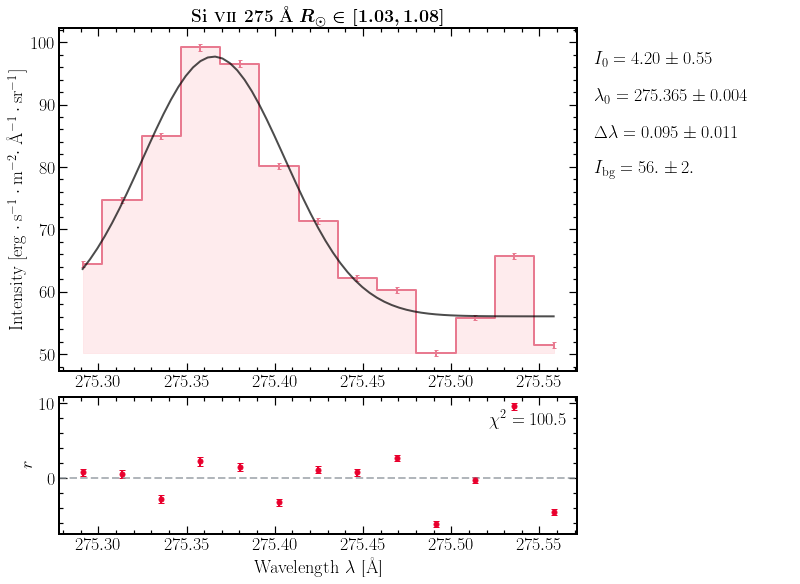

In [66]:
SiVII_275_fitmodel_r1 = SpectrumFitSingle(data=SiVII_275_data_aver_r1, wvl=SiVII_275_wvl,err=SiVII_275_err_aver_r1,
                                        line_number=1,line_wvl_init=[275.35],int_max_init=[1e2],fwhm_init=[0.07],
                                        )
SiVII_275_fitmodel_r1.run_lse(absolute_sigma=False)
SiVII_275_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{vii} 275 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.03,1.08]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiVII_275_fitmodel_r1.fwhm_fit[0]**2 - SiVII_275_slit_width_1**2)*1e3))
print("Corrected line width with smaller dlambda inst {:.1f} mÅ".format(np.sqrt(SiVII_275_fitmodel_r1.fwhm_fit[0]**2 - 0.064**2)*1e3))

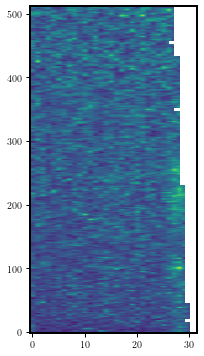

In [67]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_20[:,30,:],origin="lower",aspect="auto")

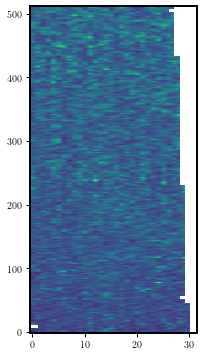

In [68]:
fig, ax =plt.subplots(figsize=(3,6))
ax.imshow(data_cube_22[:,30,:],origin="lower",aspect="auto")